In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm.notebook import tqdm
import h5py
from os.path import basename
import re
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

In [2]:
folder = '../data/4-4-2024/'
files = sorted(glob(folder+'temperature*'))
files

['../data/4-4-2024\\temperature__scan_cooling_250k-150k_5imgs_0.h5',
 '../data/4-4-2024\\temperature_scan_heating_150K-250K_5imgs_a329de9b-f643-4d3e-b267-ab723f3b1dfb.h5',
 '../data/4-4-2024\\temperature_scan_heating_150k-250k_0.h5']

## heating 0

In [3]:
file = files[1]
with h5py.File(file, 'r') as f:
    img = f['entry1']['instrument_1']['detector_1']['data'][0]

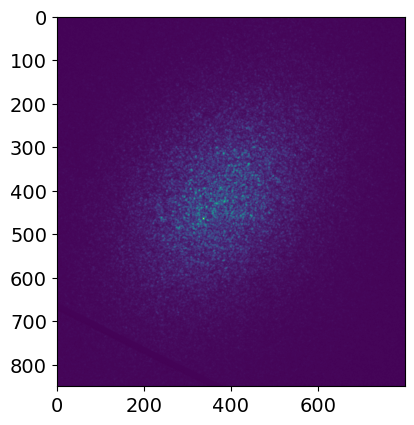

In [10]:
roi = np.s_[150:1000, 1100:1900]

plt.imshow(img[0][roi])

In [14]:
file = files[1]
with h5py.File(file, 'r') as f:
    heating0 = f['entry1']['instrument_1']['detector_1']['data'][(..., -1, *roi)]
    temps_heating0 = f['entry1']['instrument_1']['labview_data']['LS_LLHTA'][:]

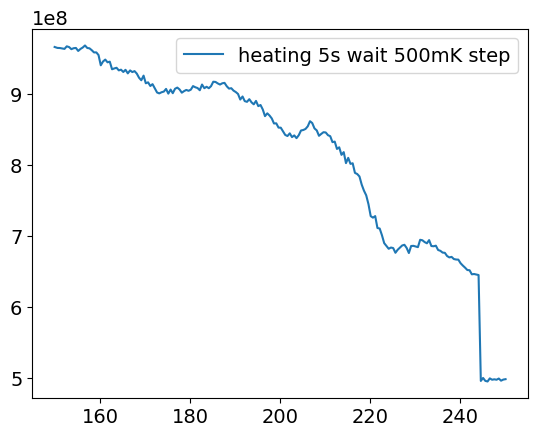

In [17]:
h0 = np.sum(heating0, axis=(1,2))

plt.figure()
plt.plot(temps_heating0, h0, label='heating 5s wait 500mK step')
plt.legend()
plt.show()

## cooling 0

In [25]:
file = files[0]
with h5py.File(file, 'r') as f:
    print(f['entry']['data']['data'].shape)
    cooling0 = f['entry']['data']['data'][(..., *roi)]

(1004, 2048, 2048)


In [27]:
c0 = cooling0[::5].sum(axis=(1,2))

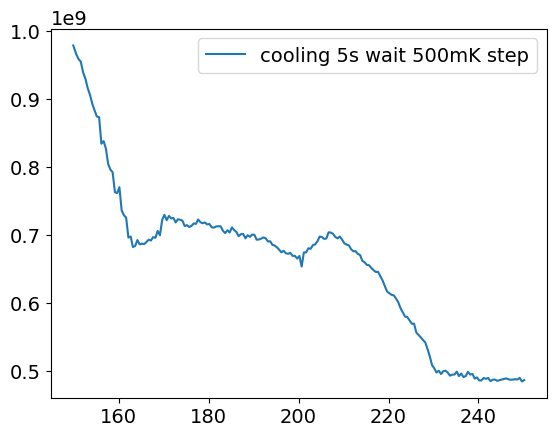

In [28]:
plt.figure()
plt.plot(temps_heating0[::-1], c0, label='cooling 5s wait 500mK step')
plt.legend()
plt.show()

## heating 1

In [29]:
file = files[2]
with h5py.File(file, 'r') as f:
    heating1 = f['entry']['data']['data'][(..., *roi)]

In [30]:
h1 = heating1[::5].sum(axis=(1,2))

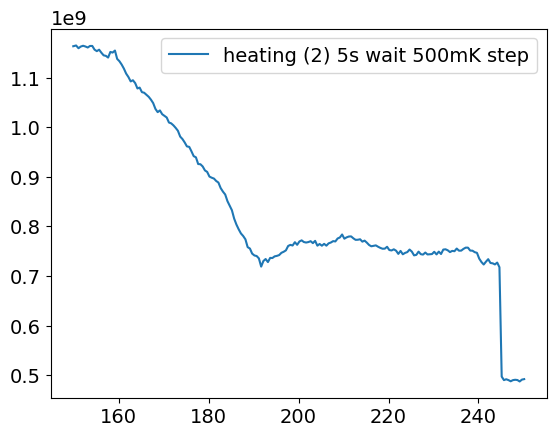

In [31]:
plt.figure()
plt.plot(temps_heating0, h1, label='heating (2) 5s wait 500mK step')
plt.legend()
plt.show()

## combined

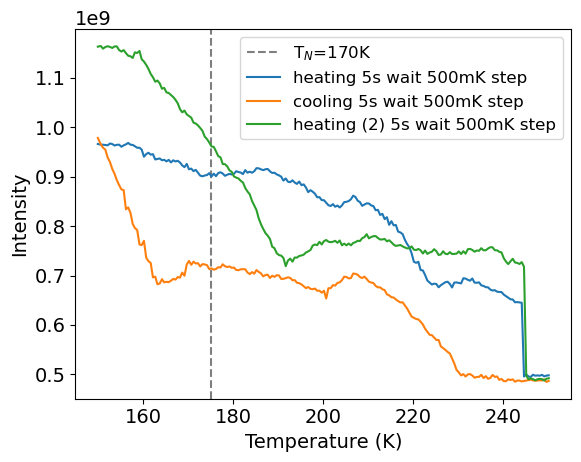

In [45]:
plt.figure()
plt.axvline(175, color='k', linestyle='--', alpha=0.5, label=r'T$_N$=170K')
plt.plot(temps_heating0, h0, label='heating 5s wait 500mK step')
plt.plot(temps_heating0[::-1], c0, label='cooling 5s wait 500mK step')
plt.plot(temps_heating0, h1, label='heating(2) 5s wait 500mK step')
plt.legend(fontsize=12)
plt.ylabel('Intensity')
plt.xlabel('Temperature (K)')
plt.show()